In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import random

In [106]:
path = "/Users/federicopigozzi/Desktop/PhD/SIGEVO2021/modeling/ComputerNetwork/output/square_medium/"

In [4]:
def plot_fitness(p, stop=100):
    df = pd.DataFrame()
    for file in os.listdir(p):
        if file == ".DS_Store":
            continue
        d = pd.read_csv(os.path.join(p, file), sep=";")
        run = file.split(".")[0]
        df[int(run)] = d["best→fitness"][:stop]
    x = np.arange(df.shape[0])
    median = df.median(axis=1)
    err = df.std(axis=1)
    plt.plot(x, median, color="red")
    plt.fill_between(x, median - err, median + err, alpha=0.25, color="red")
    plt.xlabel("iterations", fontsize=15)
    plt.ylabel("fitness", fontsize=15)

In [110]:
def depict_buildings(data_file):
    coordinates = []
    with open(data_file, "r") as f:
        for line in f:
            line = line.split(",")
            coordinates.append((int(line[0]), int(line[1])))
    image = np.full((1000, 1000, 3), 255).astype(np.int32)
    
    for coord in coordinates[:-1]:
        image = cv2.circle(image, coord, 2, (1, 1, 1), 2)
    image = cv2.circle(image, coordinates[-1], 3, (1, 0, 0), 3)
    
    return image, coordinates

In [111]:
def depict_solution(out_file, data_file):
    image, coordinates = depict_buildings(data_file)
    
    best = pd.read_csv(out_file, sep=";").loc[1000, "best→print"]
    parents = []
    i = 0
    num = ""
    while i < len(best):
        char = best[i]
        if char.isdigit():
            num += char
        elif num:
            if len(parents) > 0:
                p = parents[-1]
                image = cv2.line(image, coordinates[p], coordinates[int(num)], (1, 0, 0), 1)
            parents.append(int(num))
            num = ""
        if char == "," or char == "]":
            parents.pop(-1)
        i += 1
    
    return image

In [107]:
def plot_solutions(p, data="/Users/federicopigozzi/Desktop/PhD/SIGEVO2021/modeling/ComputerNetwork/data/square_medium.txt"):
    files = list(os.listdir(p))
    fig, axes = plt.subplots(figsize=(20, 10), nrows=2, ncols=5)
    for i in range(len(files)):
        j, k = int(i >= 5), i % 5
        axes[j][k].imshow(depict_solution(os.path.join(p, files[i]), data))
        axes[j][k].set_xticks([])
        axes[j][k].set_yticks([])

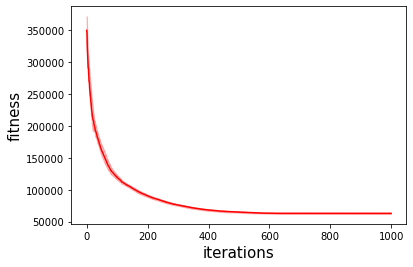

In [108]:
plot_fitness(path, stop=1000)

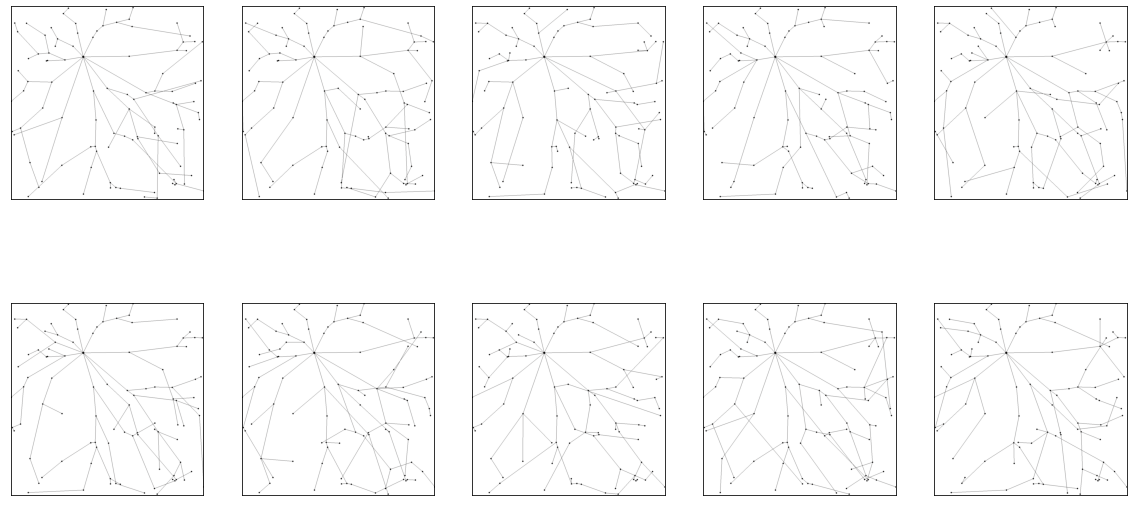

In [112]:
plot_solutions(path)

In [ ]:
n_buildings = 100
with open("test.txt", "w") as file:
    for i in range(n_buildings):
        file.write(str(random.randint(0, 1000)) + "," + str(random.randint(0, 1000)) + "\n")

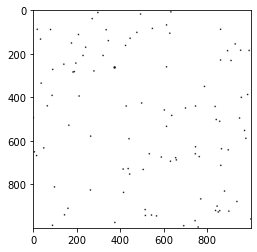

In [29]:
plt.imshow(depict_buildings("test.txt")[0])